# Mental Fitness Tracker - IBM SkillsBuild

![Mental Health](mental1.jpg)

## Introduction

Welcome to the Mental Fitness Tracker project! This comprehensive project aims to assess and monitor the mental health status of individuals or even entire countries. By utilizing various prevalence factors such as schizophrenia, eating disorders, anxiety disorders, sleeping disorders, drug use disorders, depressive disorders, and the Disability-Adjusted Life Years (DALY), this tracker provides valuable insights into mental well-being. 

Mental health is an essential aspect of overall well-being, yet it often remains overlooked or misunderstood. By developing this project, we hope to shed light on the prevalence of different mental health conditions and their impact on individuals and societies. The Mental Health Fitness Tracker combines data analysis, visualization, and machine learning techniques to generate meaningful insights and facilitate informed decision-making in the field of mental health.

## Dataset Overview

The Mental Fitness Tracker dataset contains information on various mental health prevalence factors and Disability-Adjusted Life Years (DALYs) for different countries and years. The dataset includes the following features:

- **Country**: The name of the country or region.
- **Year**: The year of observation.
- **Schizophrenia**: The prevalence or incidence rate of schizophrenia in the country.
- **Bipolar_disorder**: The prevalence or incidence rate of bipolar disorder in the country.
- **Eating_disorder**: The prevalence or incidence rate of eating disorders in the country.
- **Anxiety_disorder**: The prevalence or incidence rate of anxiety disorders in the country.
- **Drug_usage_disorder**: The prevalence or incidence rate of drug use disorders in the country.
- **Depression_disorder**: The prevalence or incidence rate of depressive disorders in the country.
- **Alcohol_use_disorder**: The prevalence or incidence rate of alcohol use disorders in the country.
- **DALYs**: The Disability-Adjusted Life Years (DALYs) attributed to mental health conditions in the country.

The DALYs measure the overall burden of mental health conditions in terms of years of healthy life lost due to premature death and years lived with a disability. A higher DALY value indicates a greater burden of mental health conditions on the population, while a lower value suggests better overall health outcomes.

The DALYs provide a standardized metric to assess and compare the impact of mental health conditions across different countries and years. By analyzing the DALYs, researchers and policymakers can identify regions with a higher burden of mental health conditions and prioritize interventions accordingly.

## Project Overflow

- 1. **Importing the libraries** - The required libraries and modules are imported 
- 2. **Data Collection** - The given dataset has been loaded into a Pandas dataframe
- 3. **Exploratory Data Analysis & Data Preprocessing** - The dataframe is analysed for any missing values or outliers and if there are any, it should be handled. Additionally, the relationship and trend between the variables using visualizations. Further, the data has to be preprocessed for efficient working of the model.
- 4. **Data Splitting** - The final cleaned and preprocessed data has to be splitted into two sets namely train and test sets.
- 5. **Model Training** - The Random Forest Regressor model then has been trained with the splitted datasets.
- 6. **Prediction & Evaluation** - The model is then used to predict the sales of the test data. The predicted values are then evaluated by using metrics like R2 Score and MSE.

Let us now dive into our project

### 1. Importing the libraries

The necessary libraries and modules have been imported to work with our project

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import kaleido.scopes.plotly
import plotly.offline as pyo
from kaleido.scopes.plotly import PlotlyScope
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 2. Data Collection

This project uses two datasets which have been provided in the IBM Project Portal. The datasets has been loaded into separate pandas dataframe named df1 and df2

In [36]:
df1 = pd.read_csv("mental-and-substance-use-as-share-of-disease.csv")
df2 = pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")

In [37]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [38]:
df2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


Those two dataframes need to be merged to work with our project.

In [39]:
data = pd.merge(df2, df1)
data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


### 3. Exploratory Data Analysis and Data Preprocessing

The data is subjected to multiple visualizations and methods to find and handle the missing values and outliers if there are any. This step is crucial, as this one helps to find the trends and relationships between variables. 

In [40]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

Dropping the unnecessary column named **'Code'** which has null values

In [41]:
data.drop('Code', axis = 1, inplace = True)

In [42]:
data.size

68400

In [43]:
data.shape

(6840, 10)

Since our dataframe consists of columns which have lengthy names, we're renaming the column names to make it shorter

In [44]:
data = data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety_disorder','Drug_usage_disorder','Depression_disorder','Alcohol_use_disorder','Mental_fitness'], axis = 1)

In [45]:
data.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety_disorder,Drug_usage_disorder,Depression_disorder,Alcohol_use_disorder,Mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


Finding the country names which has the minimum Mental_Fitness and the maximum Mental_Fitness

**Note:** The lower the value of mental_fitness value, better the actual mental health of a particular country

In [46]:
min1 = data['Mental_fitness'].min()

In [47]:
max1 = data['Mental_fitness'].max()

In [48]:
print(data.loc[data['Mental_fitness'] == min1, 'Country'].values[0])

Rwanda


In [49]:
print(data.loc[data['Mental_fitness'] == max1, 'Country'].values[0])

Qatar


In [50]:
data.groupby('Country')['Mental_fitness'].mean()

Country
Afghanistan                       2.553085
African Region (WHO)              1.940398
Albania                           5.276702
Algeria                           6.451224
American Samoa                    4.529481
                                    ...   
World Bank Lower Middle Income    3.207812
World Bank Upper Middle Income    5.006917
Yemen                             3.470172
Zambia                            1.664278
Zimbabwe                          1.743918
Name: Mental_fitness, Length: 228, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               6840 non-null   object 
 1   Year                  6840 non-null   int64  
 2   Schizophrenia         6840 non-null   float64
 3   Bipolar_disorder      6840 non-null   float64
 4   Eating_disorder       6840 non-null   float64
 5   Anxiety_disorder      6840 non-null   float64
 6   Drug_usage_disorder   6840 non-null   float64
 7   Depression_disorder   6840 non-null   float64
 8   Alcohol_use_disorder  6840 non-null   float64
 9   Mental_fitness        6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 534.5+ KB


In [17]:
data.describe()

,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety_disorder,Drug_usage_disorder,Depression_disorder,Alcohol_use_disorder,Mental_fitness
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,0.281167,0.673891,0.211062,4.327525,0.746708,3.950449,1.578807,4.818062
std,8.656074,0.047561,0.258594,0.152559,1.177961,0.463026,0.921021,0.934655,2.294029
min,1990.000000,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.319900,0.215647
25%,1997.000000,0.255468,0.539791,0.099857,3.567064,0.423502,3.258977,0.732826,3.006507
50%,2004.500000,0.287456,0.591893,0.154143,4.094443,0.646050,3.904117,1.460045,4.679177
75%,2012.000000,0.304760,0.897248,0.276891,4.797286,0.890013,4.550505,2.261262,6.387488
max,2019.000000,0.506018,1.676204,1.136541,9.015948,3.699504,7.688213,4.698694,13.761517


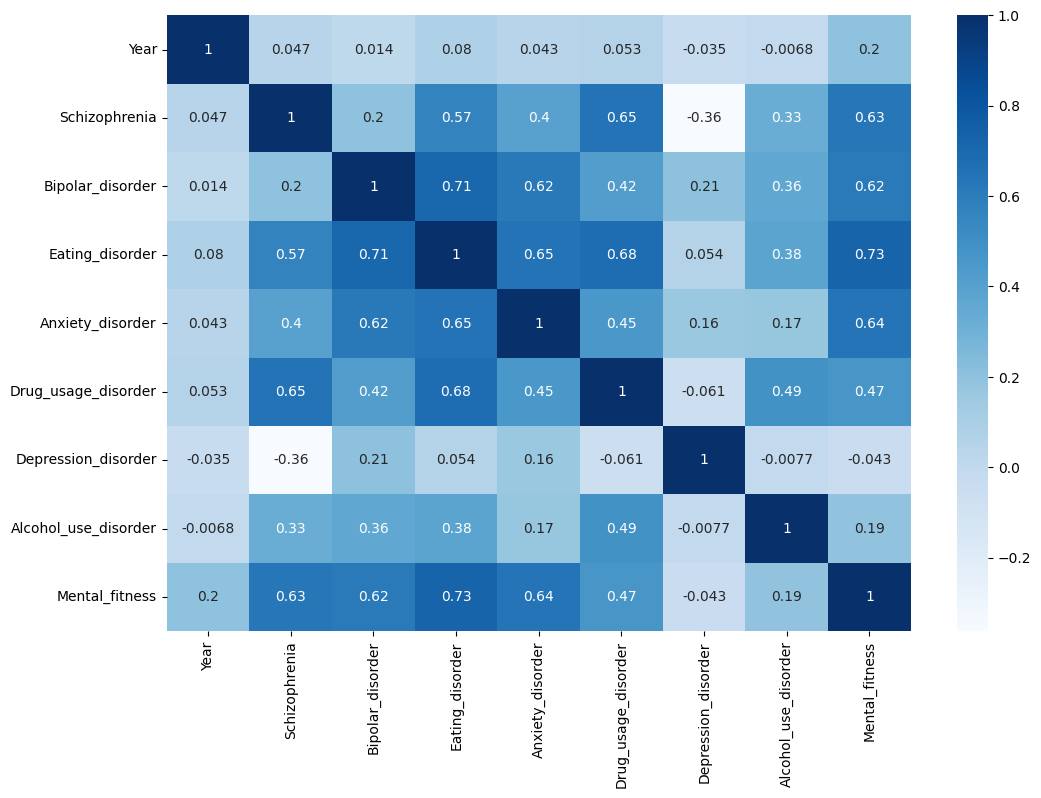

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data.drop('Country', axis = 1).corr(),annot=True,cmap='Blues')
plt.show()

From the above correlation plot, we can see that factors like eating disorder and anxiety are highly correlated with the mental fitness value. In other words, these two features majorly affect one's mental status.

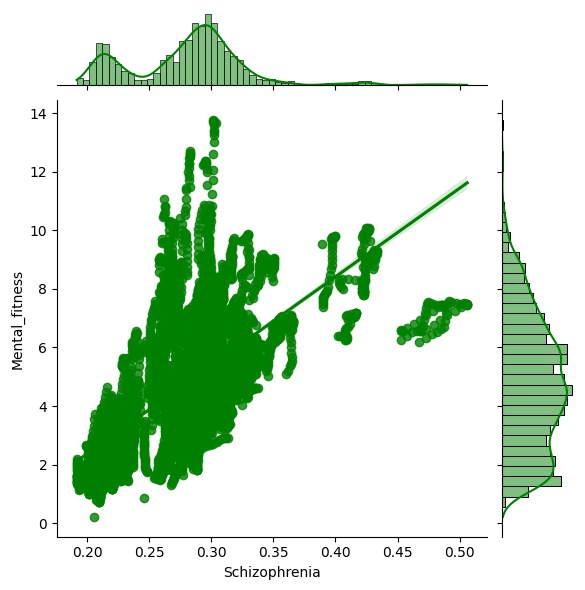

In [19]:
sns.jointplot(x = 'Schizophrenia',y = 'Mental_fitness',data = data, kind = 'reg', color='g')
plt.show()

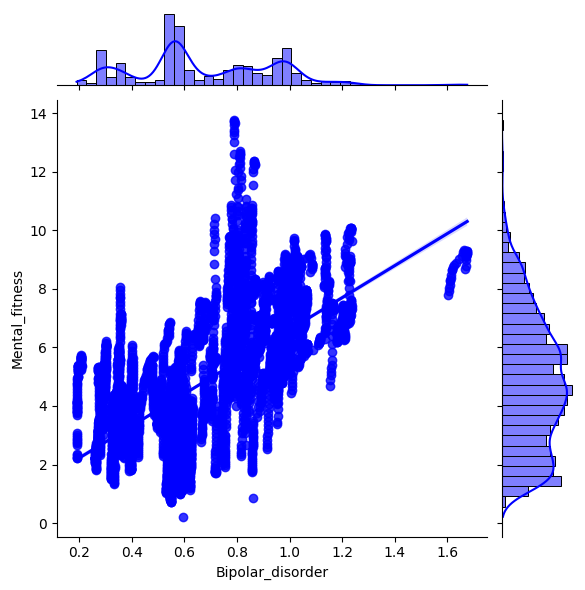

In [20]:
sns.jointplot(x = 'Bipolar_disorder', y = 'Mental_fitness', data = data, kind='reg', color='b')
plt.show()

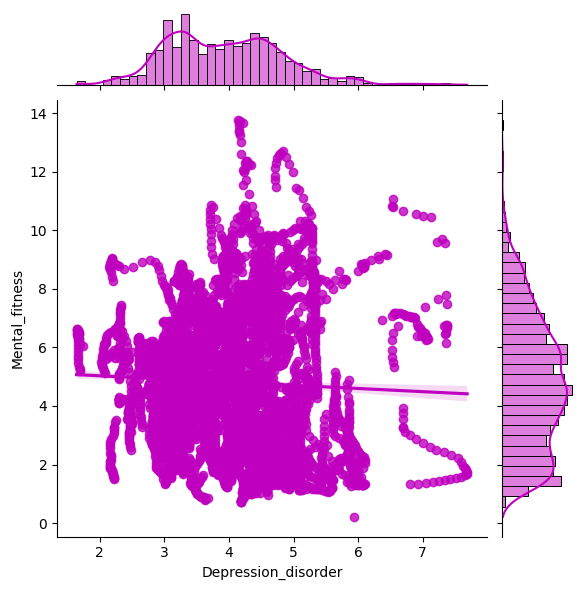

In [21]:
sns.jointplot(x = 'Depression_disorder', y = 'Mental_fitness', data = data, kind='reg', color='m')
plt.show()

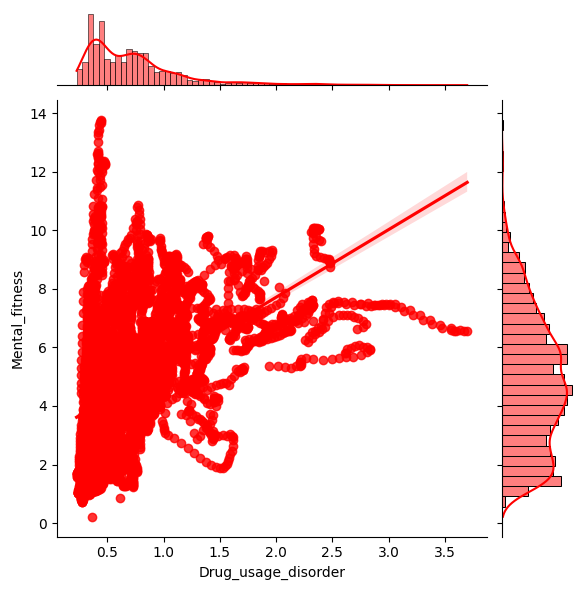

In [22]:
sns.jointplot(x = 'Drug_usage_disorder', y = 'Mental_fitness', data = data, kind='reg', color='r')
plt.show()

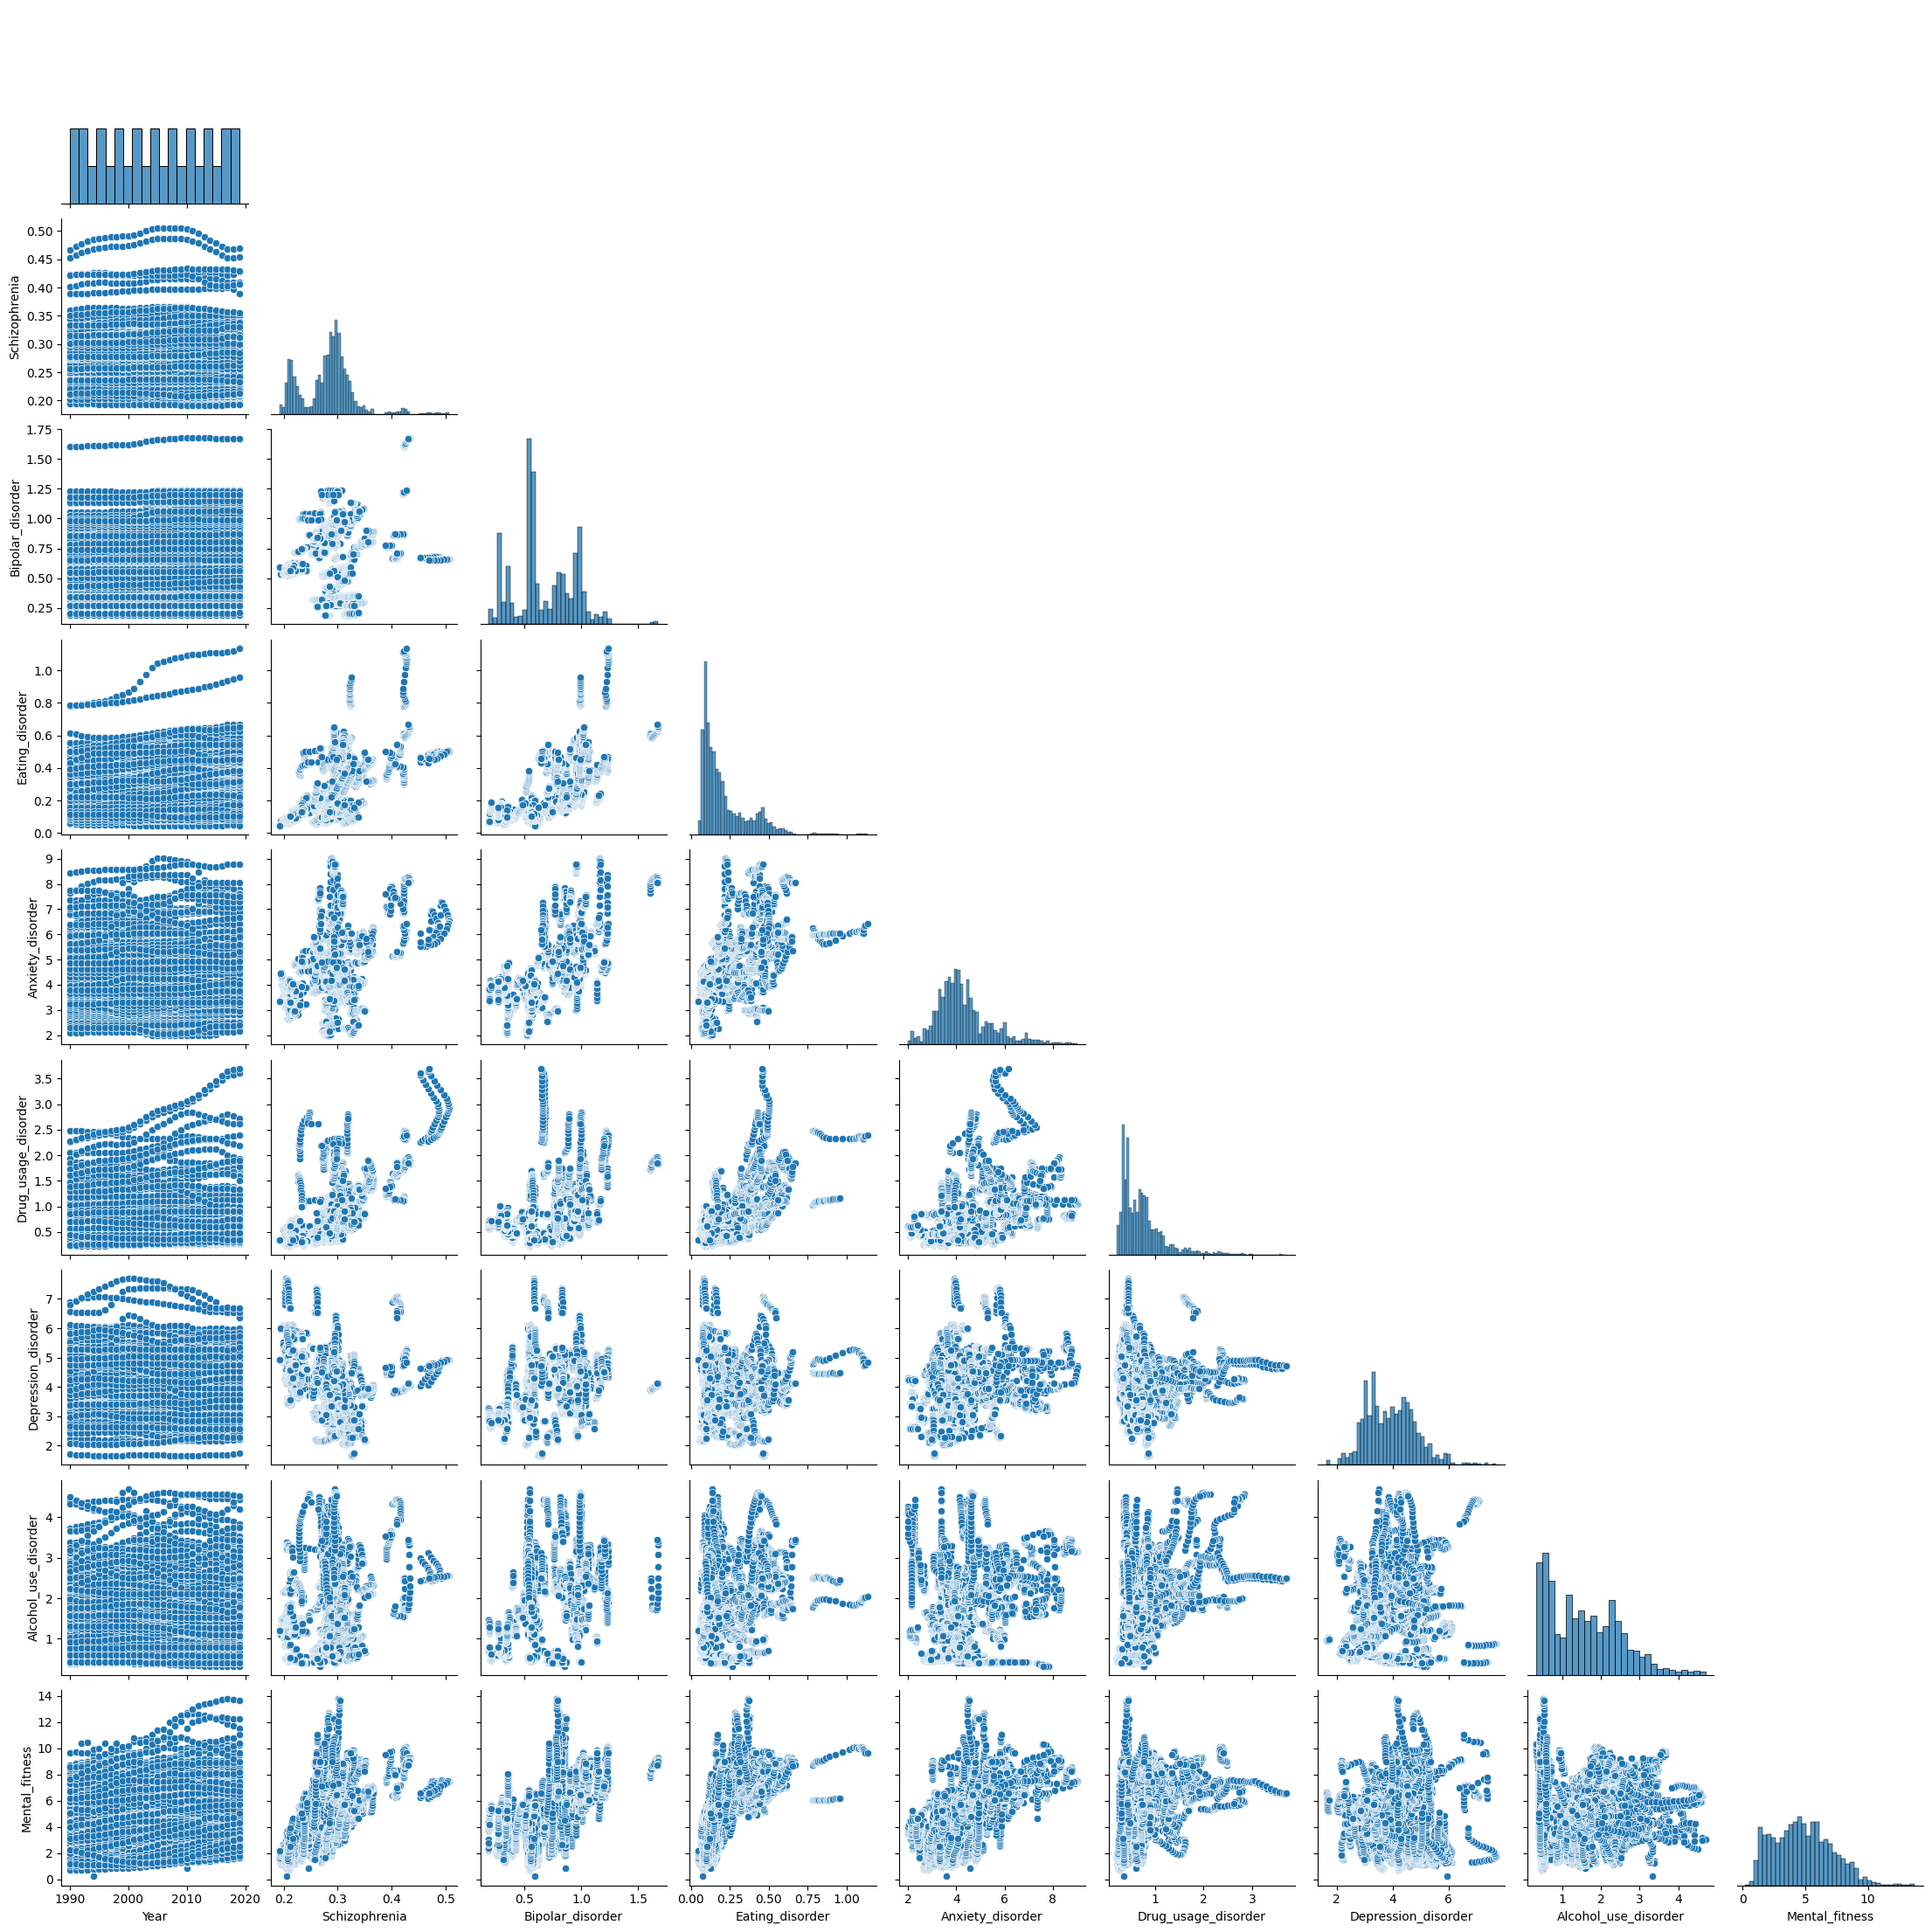

In [23]:
sns.pairplot(data = data, corner = True)
plt.show()

In [24]:
fig = px.pie(data, values='Mental_fitness', names='Year')
# fig.show()
kaleido_scope = kaleido.scopes.plotly.PlotlyScope(mathjax=None)

# Save the plot as an image
pio.write_image(fig, "pie1.png", engine = "kaleido")

![Pie chart](pie1.png)

In [25]:
fig=px.bar(data.head(30),x='Year',y='Mental_fitness',color='Year')
# fig.show()
kaleido_scope = kaleido.scopes.plotly.PlotlyScope(mathjax=None)

# Save the plot as an image
pio.write_image(fig, "bar.png", engine = "kaleido")

![Bar Chart](bar.png)

Hence, the above two charts indicates that the mental_fitness gradually increases over the year. This infact represents, many health related issues and depressive acts that reflects in our modern world

In [26]:
fig = px.line(data[data['Country'].isin(["India", "South Africa", "United States", "United Kingdom", "Japan", "China", "United Arab Emirates", "Australia"])], x="Year", y="Mental_fitness", color='Country', markers=True, color_discrete_sequence=['black','red', 'green', 'blue','orange', 'purple', 'violet', 'steelblue'], template = 'plotly')
# fig.show()
kaleido_scope = kaleido.scopes.plotly.PlotlyScope(mathjax=None)

# Save the plot as an image
pio.write_image(fig, "line.png", engine = "kaleido")

![Line Chart](line.png)

As you can see from above, I have chosen 8 different countries to give a comparative perspective of how mental burden (mental_fitness) is progressing in different countries respectively. 

**Data Encoding**

The country column is of datatype object. Hence, it has been encoded into numerical values

In [27]:
l = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = l.fit_transform(data[i])

In [28]:
data

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety_disorder,Drug_usage_disorder,Depression_disorder,Alcohol_use_disorder,Mental_fitness
0,0,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,0,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,0,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,0,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,0,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
...,...,...,...,...,...,...,...,...,...,...
6835,227,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,227,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,227,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,227,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949


### 4. Data Splitting

The dataset has been splitted into training and testing sets which accounts for 80% of data for training and 20% for testing

In [29]:
X = data.drop('Mental_fitness', axis = 1)
Y = data['Mental_fitness']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

### 5. Model Training

### Random Forest Regressor

The Random Forest Regressor is a powerful machine learning algorithm commonly used for regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions.
![Random Forest Regressor](randomforest.svg)
Image Credit: TIBCO Software (https://www.tibco.com/reference-center/what-is-a-random-forest)

The Random Forest Regressor is a versatile and powerful algorithm for regression tasks, offering robustness, feature importance analysis, the ability to handle missing values, and the capability to capture nonlinear relationships. It is widely used in various domains for tasks such as predictive modeling, healthcare, environmental studies, and financial analysis.

In [30]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

### 6. Prediction and Evaluation 
The trained model is further tested for its accuracy and then evaluated using metrics such as R2 score and MSE

In [31]:
y_pred_train = rf.predict(x_train)

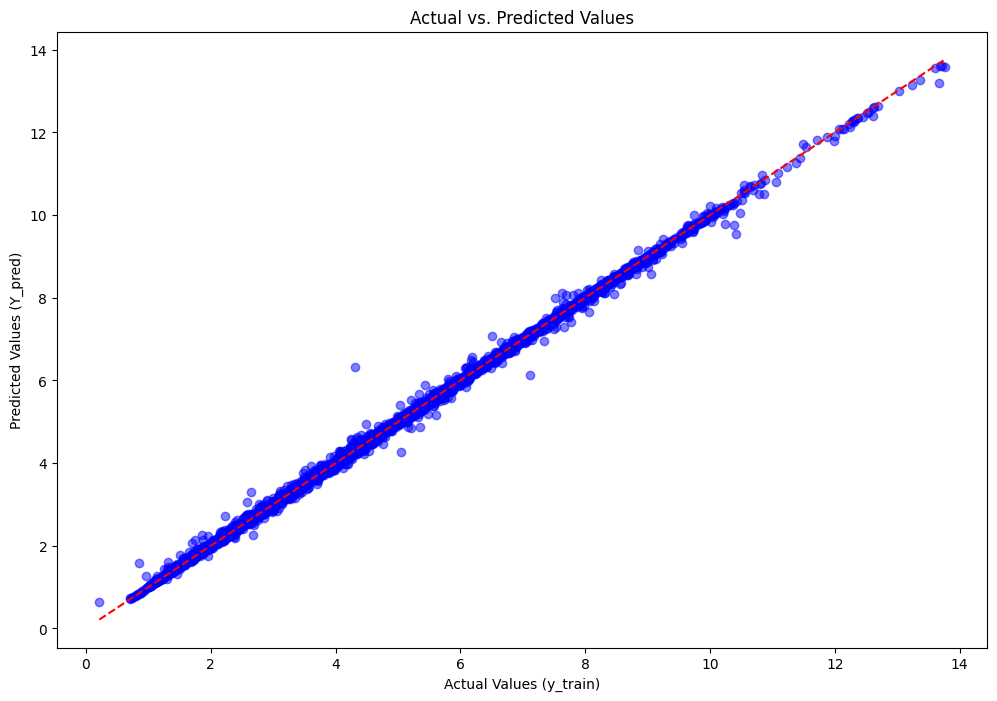

In [60]:
plt.figure(figsize = (12, 8))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (Y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

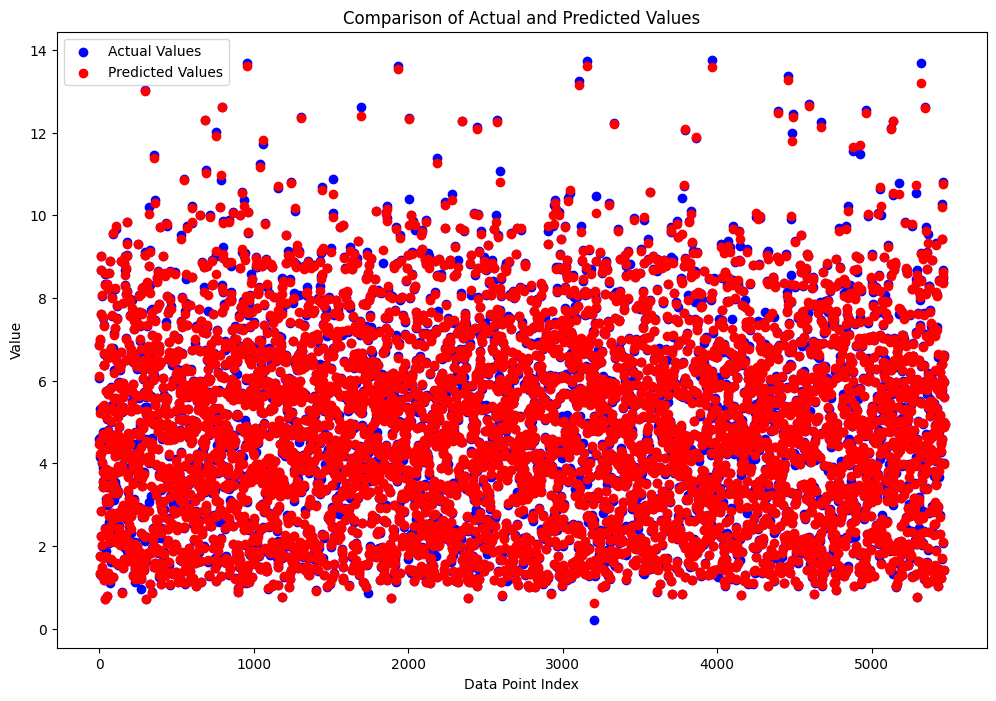

In [59]:
plt.figure(figsize = (12, 8))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred_train)), y_pred_train, color='red', label='Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [32]:
mse = mean_squared_error(y_train, y_pred_train)
rmse = (np.sqrt(mse))
r2 = r2_score(y_train, y_pred_train)

In [33]:
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 0.005399676110561961
RMSE is 0.07348248846195915
R2 score is 0.998995104807465




In [34]:
y_pred_test = rf.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("The model performance for testing set")
print("-------------------------------------")
print('MSE is {}'.format(mse_test))
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))
print("\n")

The model performance for testing set
-------------------------------------
MSE is 0.030980980412312852
RMSE is 0.1760141483299364
R2 score is 0.9935596208946855




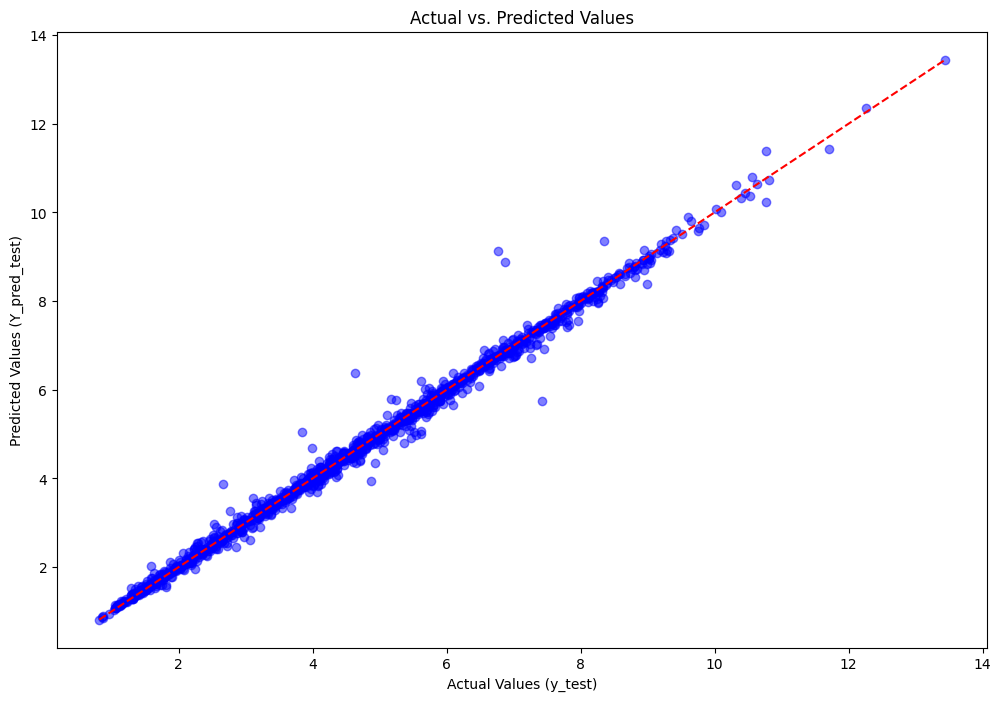

In [62]:
plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (Y_pred_test)')
plt.title('Actual vs. Predicted Values')
plt.show()

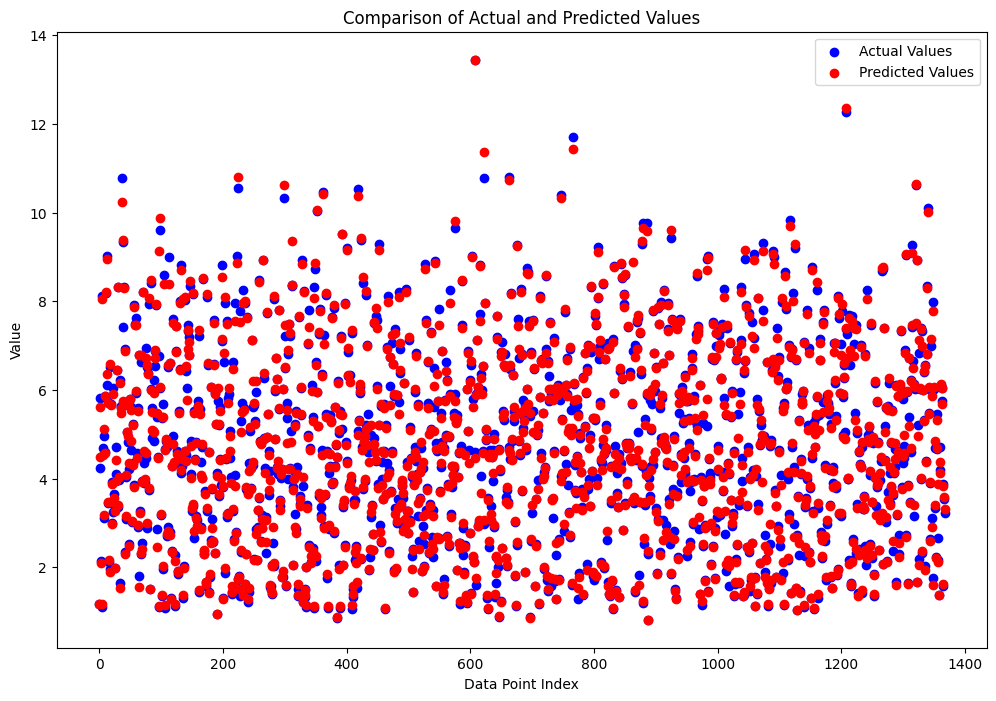

In [63]:
plt.figure(figsize = (12, 8))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred_test)), y_pred_test, color='red', label='Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

## The End